<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data_set = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print(data_set.shape)

(44744, 12)


*разделитель внутри файла - ';'*

*DataFrame содержит 44744 строк и 12 признаков*

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
data_set.head(2)

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

In [165]:
data_hh = data_set.copy() 
data_hh.head(2)

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [153]:
data_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

*в признаках 'Опыт работы','Последнее/нынешнее место работы','Последняя/нынешняя должность' количество заполеных ячеек меньше 44744-х*

*также тип всех данных - object*

5. Выведите основную статистическую информацию о столбцах.


In [154]:
data_hh.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

*в столбце 'опыт работы' число уникальных значений - 44413*

*самая распространённая должность - Системный администратор*

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [166]:
def get_education(arg):
    """Transformation of the education attribute
    """   
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее' in arg:
        return 'среднее'
    else:
        return 'Нет информации'
data_hh['Образование'] = data_hh['Образование и ВУЗ'].apply(get_education)
data_hh = data_hh.drop('Образование и ВУЗ', axis=1)

In [167]:
u_data = data_hh['Образование'].unique()
print(f'уникальные значения в признаке "Образование": {u_data}')

уникальные значения в признаке "Образование": ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


*в признаке "Образование" только значения - 'неоконченное высшее' 'высшее' 'среднее специальное' 'среднее'*

*других уникальных значений не осталось*

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [168]:
# Сколько соискателей имеет средний уровень образования (школьное образование)?
data_hh['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

In [169]:
def get_gender(arg):
    """gender attribute conversion
    """
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'
    
def get_age(arg):
    """conversion of the age attribute
    """
    arg_splitted = arg.split(' ')
    year_words=['год', 'года', 'лет']
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            return int(arg_splitted[index-1])

data_hh['Пол'] = data_hh['Пол, возраст'].apply(get_gender)
data_hh['Возраст'] = data_hh['Пол, возраст'].apply(get_age)
data_hh = data_hh.drop('Пол, возраст', axis=1)
wom_res = round(data_hh['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)
mid_age = round(data_hh['Возраст'].mean(), 2)
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print(f'{wom_res} процентов женских резюме представлено в наших данных')
# Чему равен средний возраст соискателей? Ответ округлите до десятых.
print(f'{mid_age} года - средний возраст соискателей')


19.07 процентов женских резюме представлено в наших данных
32.2 года - средний возраст соискателей


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [170]:
def get_experience(arg):
    """conversion of the work experience attribute
    """
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data_hh['Опыт работы (месяц)'] = data_hh['Опыт работы'].apply(get_experience)
data_hh = data_hh.drop(['Опыт работы'], axis=1)
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
exp_mean = data_hh['Опыт работы (месяц)'].median()
print(f'Mедианный опыт работы (в месяцах) в нашей таблице равен: {exp_mean}')

Mедианный опыт работы (в месяцах) в нашей таблице равен: 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [172]:
def get_citi(arg):
    """transformation of the City, moving, business trips attribute
    and сreating separate signs "City", "Ready to move", "Ready for business trips"
    """
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    arg_list = arg.split(' ')
    arg_type = arg_list[0]
    if arg_type in million_cities:
        return 'город-миллионник'
    elif arg_type == 'Москва':
        return 'Москва'
    elif arg_type == "Санкт-Петербург":
        return "Санкт-Петербург"
    else:
        return "другие"
def get_ready_for_trips(arg):
    if ('не готов к переезду' in arg) or('не готова к переезду' in arg):
        return False
    else: 
        return True
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            return True
    else:
        return False
data_hh['Город'] = data_hh['Город, переезд, командировки'].apply(get_citi)
data_hh['Готовность к переезду'] = data_hh['Город, переезд, командировки'].apply(get_ready_for_trips)
data_hh['Готовность к командировкам'] = data_hh['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data_hh = data_hh.drop(['Город, переезд, командировки'], axis=1)
data_hh.head(2)

ЗП Ищет работу на должность:  \
0  29000 руб.   Системный администратор   
1  40000 руб.      Технический писатель   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)   Город  Готовность к переезду  \
0                202.0  другие                  False   
1                233.0  другие                  False   

   Готовность к командировкам  
0                       False  
1                        True

In [174]:
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
spb_citizen = round(data_hh['Город'].value_counts(normalize=True)['Санкт-Петербург']*100)
print(f'{spb_citizen} процентов соискателей живут в Санкт-Петербурге')
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
travel_and_btravel = round(data_hh[data_hh['Готовность к переезду'] & data_hh['Готовность к командировкам']].shape[0] / data_hh.shape[0] *100)
print(f'{travel_and_btravel} процентов соискателей готовы одновременно и к переездам, и к командировкам')

11 процентов соискателей живут в Санкт-Петербурге
32 процентов соискателей готовы одновременно и к переездам, и к командировкам


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [175]:
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    data_hh[employment] = data_hh['Занятость'].apply(lambda x: employment in x)
    data_hh[chart] = data_hh['График'].apply(lambda x: chart in x)
data_hh = data_hh.drop('Занятость', axis=1)
data_hh = data_hh.drop('График', axis=1)


In [177]:
# Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?
proect_or_volont = data_hh[data_hh['проектная работа'] & data_hh['волонтерство']].shape[0]
print(f' {proect_or_volont} людей ищут проектную работу или волонтёрство')
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
shift_and_free = data_hh[data_hh['вахтовый метод'] & data_hh['гибкий график']].shape[0]
print(f'{shift_and_free} людей хотят работать вахтовым методом и с гибким графиком')
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
exp_median = data_hh['Опыт работы (месяц)'].median()
print(f'медианный опыт работы (в месяцах) в нашей таблице равен: {exp_median}')

 436 людей ищут проектную работу или волонтёрство
2311 людей хотят работать вахтовым методом и с гибким графиком
медианный опыт работы (в месяцах) в нашей таблице равен: 100.0


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [179]:
ExchangeRates = pd.read_csv('data\ExchangeRates.csv') # файл котировок валют
ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date'], dayfirst=True).dt.date
ExchangeRates  = ExchangeRates.drop(['per','time','vol'], axis=1) # неитересующие признаки
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме'], dayfirst=True).dt.date

def get_salary_num(arg):
    """separate the salary amount
    """
    salary = float(arg.split(' ')[0])
    return salary

def get_currency(arg):
    """currency name conversion
    """
    currencys = {
        'грн': 'UAH','USD': 'USD', 'EUR': 'EUR',  'белруб': 'BYN',
        'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currencys[curr]
    
data_hh['salary_num'] = data_hh['ЗП'].apply(get_salary_num)
data_hh['currency_hh'] = data_hh['ЗП'].apply(get_currency)


merged = data_hh.merge(
    ExchangeRates,
    left_on=['currency_hh', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how= 'left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

data_hh['ЗП (руб)'] = merged['close'] * merged['salary_num'] / merged['proportion']
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
salary_men = round(data_hh['ЗП (руб)'].median()/1000)
print(f'желаемая медианная заработная плата соискателей в нашей таблице равна: {salary_men}')


желаемая медианная заработная плата соискателей в нашей таблице равна: 59


In [180]:
data_hh = data_hh.drop('ЗП', axis=1)
data_hh = data_hh.drop('salary_num', axis=1)
data_hh = data_hh.drop('currency_hh', axis=1)
data_hh.head(2)

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор        2019-04-16   
1  Менеджер проекта, Аналитик, Технический писатель        2019-04-12   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)   Город  ...  полный день  частичная занятость  \
0                202.0  другие  ...         True                 True   
1                233.0  другие  ...         True                 True   

   сменный график  проектная работа  гибкий график  волонтерство  \
0            True              True           True         False   
1            True              True           True         False   

   удаленная работа  стажировка  вахтовый метод  ЗП (руб)  
0              True       False            True   29000.0  
1              True       False           False   40000.0  

[2 rows x 23 columns]

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

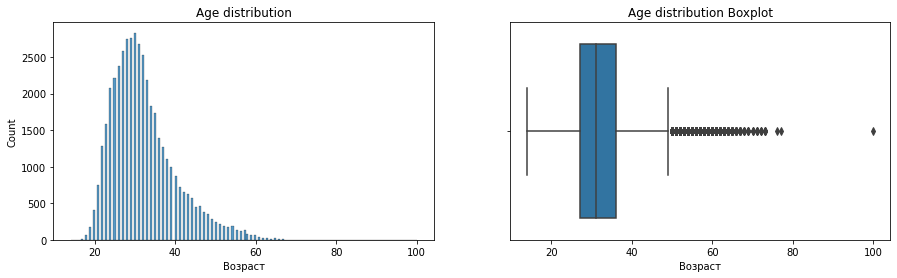

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data_hh, x='Возраст', ax=axes[0]);
histplot.set_title('Age distribution');
boxplot = sns.boxplot(data=data_hh, x='Возраст', ax=axes[1]);
boxplot.set_title('Age distribution Boxplot');

In [ ]:
data_hh['Возраст'].mode() # Чему равно модальное значение возраста соискателей?
#data_hh['Возраст'].max()
#data_hh['Возраст'].min()

*мода распределения равна - 30*

*предельные значения признака - минимум 14, максимум 100, интервал возраста большинства соискателей - от 20 до 60 лет*

*для данного признака имеется аномаля - возраст одного соискателя равна 100 годам*

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

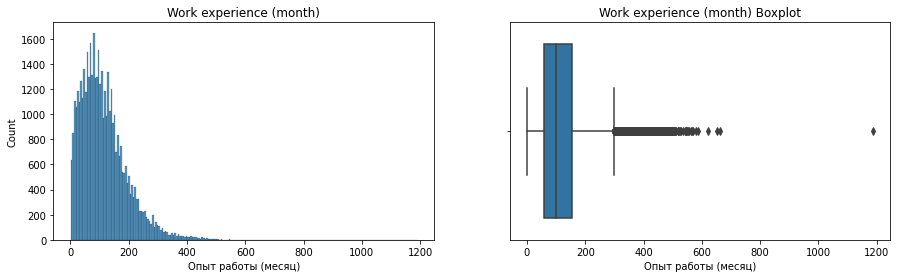

In [106]:
# ваш код здесь
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data_hh, x='Опыт работы (месяц)', ax=axes[0]);
histplot.set_title('Work experience (month)');
boxplot = sns.boxplot(data=data_hh, x='Опыт работы (месяц)', ax=axes[1]);
boxplot.set_title('Work experience (month) Boxplot');

In [111]:
# data_hh['Опыт работы (месяц)'].mode()
# data_hh['Опыт работы (месяц)'].max() # Чему равен максимальный опыт работы (в месяцах)?
data_hh['Опыт работы (месяц)'].min()

1.0

*мода распределения равна - 81*

*предельные значения признака - минимум 1, максимум 1188, интервал опыта большинства соискателей - от 1 до 300 месяцев*

*для данного признака имеется аномаля - опыт работы соискателя 1188 месяцев*

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


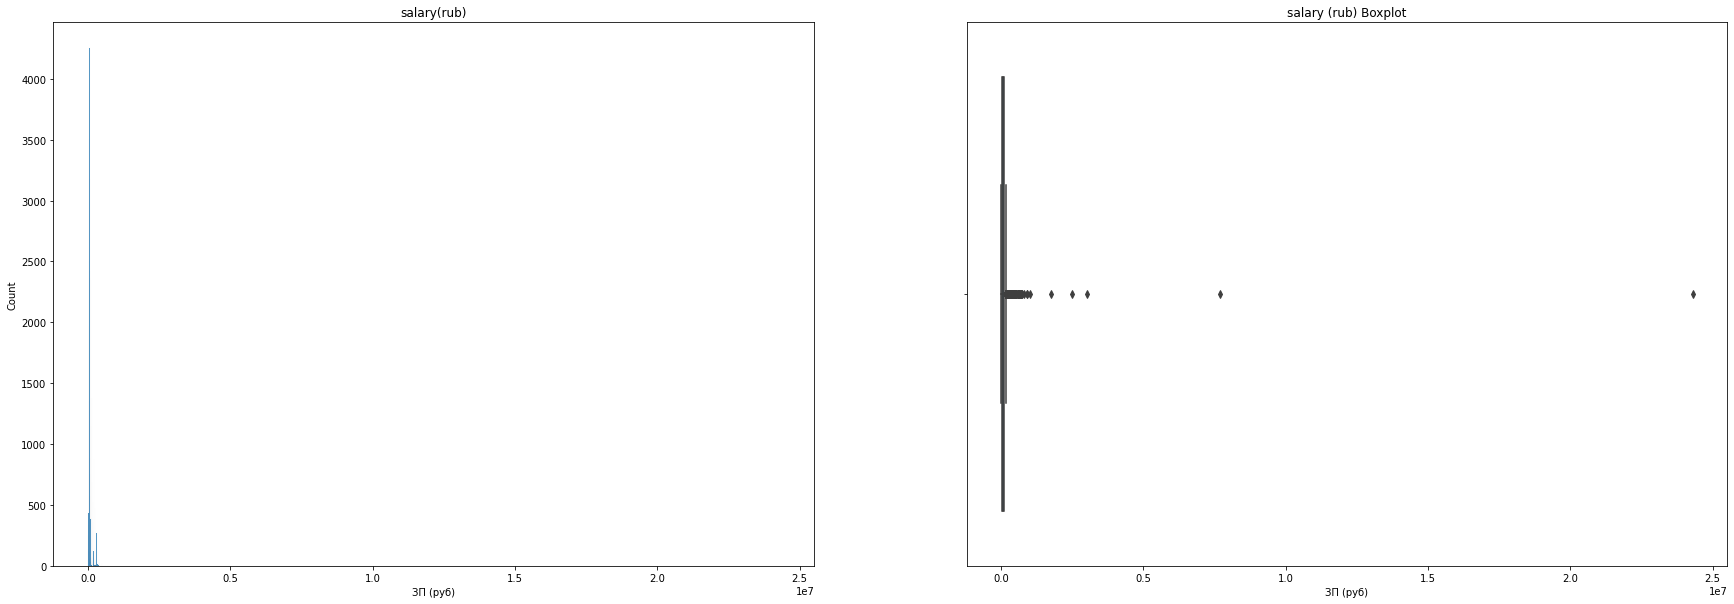

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
histplot = sns.histplot(data=data_hh, x='ЗП (руб)', ax=axes[0]);
histplot.set_title('salary(rub)');
boxplot = sns.boxplot(data=data_hh, x='ЗП (руб)', ax=axes[1]);
boxplot.set_title('salary (rub) Boxplot');

In [121]:
#data_hh['ЗП (руб)'].mode()
data_hh['ЗП (руб)'].max() 
#data_hh['ЗП (руб)'].min()


24304876.0

*мода распределения равна - 50000*

*предельные значения признака - минимум 1, максимум 24 304 876 рублей, интервал зарплаты большинства соискателей - по такому распределению определить невозможно*

*для данного признака имеется аномаля - зарплата соискателя равна 24 304 876 рублей*

In [118]:
fig = px.histogram(
    data_frame=data_hh,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=500,
    marginal='box'
)
fig.show()


*по графику можно определить, что пять соискателей требуют заработную плату выше 1 миллиона рублей.*

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [122]:
bar_data = data_hh[data_hh['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная з/п по уровню образования'
)
fig.show()

*Для высшего образования наблюдаются наибольшие уровни желаемой заработной платы, а для среднего и среднего специального наименьшие уровни желаемой заработной платы*
*Признак уровня образования при прогнозировании заработной платы важен*

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [123]:
box_data = data_hh[data_hh['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п по городам'
)
fig.show()

*В категории городов "другие" зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей) среди зарплат до 1 млн.рублей.*

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [124]:
bar_data = data_hh.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

*Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна ~66 тыс.руб.*

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [127]:
pivot = data_hh.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot,
    aspect='avto',
    color_continuous_scale='blues',
    title='Медианная з/п по образованию и возрасту'
)
fig.show()

*Для категории высшее образование наблюдается самый быстрый карьерный рост*

*есть соискатели с высшим образованием и возрастом от 14-ти до 17-ти лет, и особенно 16-ти летние с высшим образованием желающие медианную зарплату в 122 тысячи рублей*

*также виден выброс в среднем специальном образовании - возраст 100 лет*

*люди с высшим образованием трудоспособны большее количество лет*

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

<AxesSubplot:title={'center':'Зависимость опыта работы от возраста'}, xlabel='Возраст', ylabel='Опыт работы (год)'>

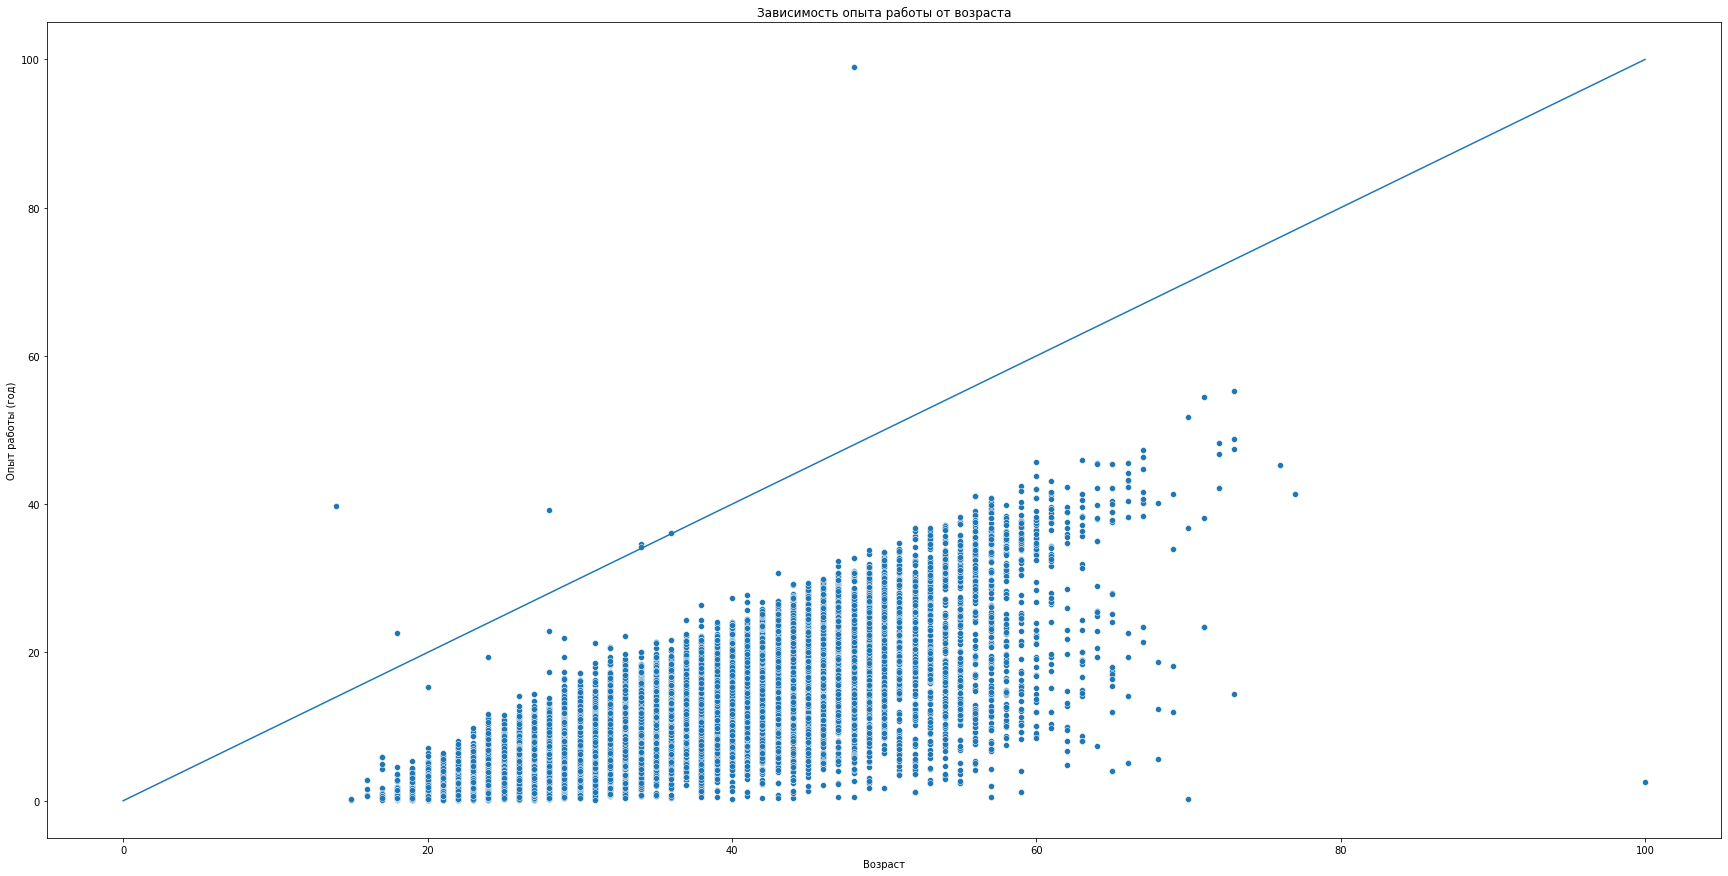

In [128]:
fig = plt.figure(figsize=(30, 15))
scatter_data = data_hh.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');
sns.lineplot(x=[0, 100], y=[0, 100])

*опыт работы не может быть больше возраста (диагональ показывает равенство опыта и возраста)*
*с увеличением возраста растет опыт*

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [203]:
dupl_columns = list(data_hh.columns)
mask = data_hh.duplicated(subset=dupl_columns)
data_hh_duplicates = data_hh[mask]
print(f'Число найденных дубликатов: {data_hh_duplicates.shape[0]}')

Число найденных дубликатов: 161


In [204]:
data_hh_dedupped = data_hh.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_hh_dedupped.shape[0]}')

Результирующее число записей: 44583


In [205]:
data_hh_dedupped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  int64  
 8   Опыт работы (месяц)              44415 non-null  float64
 9   Город                            44583 non-null  object 
 10  Готовность к переезду            44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  полная занятость  

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [206]:
null_data = data_hh_dedupped.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [207]:
data_hh_dedupped = data_hh_dedupped.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data_hh_dedupped['Опыт работы (месяц)'] = data_hh_dedupped['Опыт работы (месяц)'].fillna(data_hh_dedupped['Опыт работы (месяц)'].median())
# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
res_val_exp = round(data_hh_dedupped['Опыт работы (месяц)'].mean())
print(f'результирующее среднее значение в столбце «Опыт работы (месяц)»: {res_val_exp}')

результирующее среднее значение в столбце «Опыт работы (месяц)»: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [208]:
outliers = data_hh_dedupped[(data_hh_dedupped['ЗП (руб)'] > 1e6) | (data_hh_dedupped['ЗП (руб)'] < 1e3)]
data = data_hh_dedupped.drop(outliers.index)
print(f'число выбросов: {outliers.shape[0]}')

число выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [209]:
outliers = data_hh_dedupped[data_hh_dedupped['Опыт работы (месяц)']/12 >= data_hh_dedupped['Возраст']]
data_hh_dedupped = data_hh_dedupped.drop(outliers.index)
print(f'удаляем {outliers.shape[0]} резюме, в которых опыт работы в годах превышает возраст соискателя')

удаляем 7 резюме, в которых опыт работы в годах превышает возраст соискателя


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

3 выбросов вы нашли с помощью метода z-отклонений


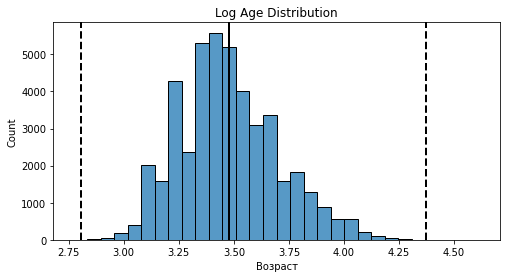

In [210]:
# ваш код здесь
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data_hh_dedupped['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

def outliers_z_score_mod(data_hh_dedupped, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data_hh_dedupped[feature]+1)
    else:
        x = data_hh_dedupped[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data_hh_dedupped[(x < lower_bound) | (x > upper_bound)]
    cleaned = data_hh_dedupped[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, data_hh_dedupped = outliers_z_score_mod(data_hh_dedupped, 'Возраст', left=3,  right=4, log_scale=True)
print(f'{outliers.shape[0]} выбросов вы нашли с помощью метода z-отклонений')


*В данном задании я произвел анализ, преобразование, очистку и визуализацию данных.*